# Testing ⏭ GreedLR Scheduler for 🤗 Transformers

## 1. Translation

### Need to reinstall from source to register changes

(may need to restart kernel)

In [2]:
%pip install -r translation/requirements.txt
%pip install -e ~/transformers/ #Or wherever you downloaded this source 

Keyring is skipped due to an exception: 'keyring.backends'
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Keyring is skipped due to an exception: 'keyring.backends'
Obtaining file:///root/transformers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.0.dev1
    Uninstalling transformers-4.27.0.dev1:
      Successfully uninstalled transformers-4.27.0.dev1
  Running setup.py develop for transformers
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Add test folders to PATH

In [2]:
import sys
import os
SRC_DIRS = [
    os.path.join('./', dirname) for dirname in [
        "text-generation",
        "text-classification",
        "token-classification",
        "language-modeling",
        "multiple-choice",
        "question-answering",
        "summarization",
        "translation",
        "image-classification",
        "speech-recognition",
        "audio-classification",
        "speech-pretraining",
        "image-pretraining",
        "semantic-segmentation",
    ]
]
sys.path.extend(SRC_DIRS)

In [2]:
from translation import run_translation
import argparse
import json
import logging
import os
import sys
from unittest.mock import patch

import torch

from transformers import ViTMAEForPreTraining, Wav2Vec2ForPreTraining
from transformers.testing_utils import CaptureLogger, TestCasePlus, get_gpu_count, slow, torch_device
from transformers.utils import is_apex_available
from utils import *

def get_results(output_dir):
    results = {}
    path = os.path.join(output_dir, "all_results.json")
    if os.path.exists(path):
        with open(path, "r") as f:
            results = json.load(f)
    else:
        raise ValueError(f"can't find {path}")
    return results

In [3]:
# %pip install sacremoses

### Default AdamW_HF with LambdaLR (linear, default)

In [4]:
tmp_dir = get_auto_remove_tmp_dir()
testargs = f"""
    run_translation.py
    --model_name_or_path facebook/blenderbot_small-90M
    --source_lang de
    --target_lang en
    --dataset_name opus100
    --dataset_config_name de-en
    --output_dir {tmp_dir}
    --overwrite_output_dir
    --max_steps=1000
    --do_train
    --learning_rate=1e-4
    --per_device_train_batch_size=4
    --save_strategy no
    --logging_steps 10
    --seed 42
    --optim sgd
    --lr_scheduler constant_with_warmup
""".split()

with patch.object(sys, "argv", testargs):
    run_translation.main()
    result = get_results(tmp_dir)
    # print(result["eval_bleu"]>30)


04/10/2023 14:57:27 - WARNING - translation.run_translation - Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: False
04/10/2023 14:57:27 - INFO - translation.run_translation - Training/evaluation parameters Seq2SeqTrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
critical_step=-1,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
factor=0.95,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transform

  0%|          | 0/3 [00:00<?, ?it/s]

[INFO|configuration_utils.py:668] 2023-04-10 14:57:28,591 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--facebook--blenderbot_small-90M/snapshots/22edc296c6a0ff86e422c6726a3d0409bc12c6c8/config.json
[INFO|configuration_utils.py:720] 2023-04-10 14:57:28,603 >> Model config BlenderbotSmallConfig {
  "_name_or_path": "facebook/blenderbot_small-90M",
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "BlenderbotSmallForConditionalGeneration"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 1,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 512,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 2048,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 8,
  "decoder_start_token_id": 1,
  "do_blenderbot_90_layernorm": true,
  "dropout": 0.1,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 2048,
  "encoder_layerdrop": 0.0,
  

04/10/2023 14:57:31 - WARNING - datasets.arrow_dataset - Loading cached processed dataset at /root/.cache/huggingface/datasets/opus100/de-en/0.0.0/256f3196b69901fb0c79810ef468e2c4ed84fbd563719920b1ff1fdc750f7704/cache-5159bf82c4e89f14.arrow


[INFO|trainer.py:543] 2023-04-10 14:57:33,105 >> max_steps is given, it will override any value given in num_train_epochs
[INFO|trainer.py:1758] 2023-04-10 14:57:33,115 >> ***** Running training *****
[INFO|trainer.py:1759] 2023-04-10 14:57:33,116 >>   Num examples = 1000000
[INFO|trainer.py:1760] 2023-04-10 14:57:33,116 >>   Num Epochs = 1
[INFO|trainer.py:1761] 2023-04-10 14:57:33,117 >>   Instantaneous batch size per device = 4
[INFO|trainer.py:1762] 2023-04-10 14:57:33,118 >>   Total train batch size (w. parallel, distributed & accumulation) = 4
[INFO|trainer.py:1763] 2023-04-10 14:57:33,119 >>   Gradient Accumulation steps = 1
[INFO|trainer.py:1764] 2023-04-10 14:57:33,119 >>   Total optimization steps = 1000
[INFO|trainer.py:1766] 2023-04-10 14:57:33,120 >>   Number of trainable parameters = 87508992


Step,Training Loss
10,5.281700
20,4.582000
30,5.134500
40,4.638200
50,4.347400
60,4.984200
70,4.653800
80,5.229300
90,4.887400
100,5.235400


RuntimeError: philox_cuda_state for an unexpected CUDA generator used during capture. In regions captured by CUDA graphs, you may only use the default CUDA RNG generator on the device that's current when capture begins. If you need a non-default (user-supplied) generator, or a generator on another device, please file an issue.

In [5]:
import json

alllogs = json.load(open(f'{tmp_dir}/trainer_state.json'))
d1 = [ (l['step'], l['learning_rate'], l['loss']) for l in alllogs['log_history'][:-1] ]

!rm -r {tmp_dir}

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmp0pqt2l0x/trainer_state.json'

### With GreedyLR

In [3]:
tmp_dir = get_auto_remove_tmp_dir()
testargs = f"""
    run_translation.py
    --model_name_or_path facebook/blenderbot_small-90M
    --source_lang de
    --target_lang en
    --dataset_name opus100
    --dataset_config_name de-en
    --output_dir {tmp_dir}
    --overwrite_output_dir
    --max_steps=1000
    --warmup_steps=0
    --do_train
    --learning_rate=1e-4
    --per_device_train_batch_size=4
    --lr_scheduler_type greedy
    --save_strategy no
    --logging_steps 10
    --min_lr=1e-5
    --smooth True
    --patience 10
    --factor 0.95
    --seed 42
    --optim sgd
""".split()

with patch.object(sys, "argv", testargs):
    run_translation.main()
    result = get_results(tmp_dir)
    # print(result["eval_bleu"]>30)


04/10/2023 14:58:55 - WARNING - translation.run_translation - Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: False
04/10/2023 14:58:55 - INFO - translation.run_translation - Training/evaluation parameters Seq2SeqTrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
critical_step=-1,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
factor=0.95,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transform

  0%|          | 0/3 [00:00<?, ?it/s]

[INFO|configuration_utils.py:668] 2023-04-10 14:58:56,465 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--facebook--blenderbot_small-90M/snapshots/22edc296c6a0ff86e422c6726a3d0409bc12c6c8/config.json
[INFO|configuration_utils.py:720] 2023-04-10 14:58:56,477 >> Model config BlenderbotSmallConfig {
  "_name_or_path": "facebook/blenderbot_small-90M",
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "BlenderbotSmallForConditionalGeneration"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 1,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 512,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 2048,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 8,
  "decoder_start_token_id": 1,
  "do_blenderbot_90_layernorm": true,
  "dropout": 0.1,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 2048,
  "encoder_layerdrop": 0.0,
  

04/10/2023 14:58:58 - WARNING - datasets.arrow_dataset - Loading cached processed dataset at /root/.cache/huggingface/datasets/opus100/de-en/0.0.0/256f3196b69901fb0c79810ef468e2c4ed84fbd563719920b1ff1fdc750f7704/cache-5159bf82c4e89f14.arrow


[INFO|trainer.py:543] 2023-04-10 14:59:01,018 >> max_steps is given, it will override any value given in num_train_epochs
[INFO|trainer.py:1758] 2023-04-10 14:59:01,028 >> ***** Running training *****
[INFO|trainer.py:1759] 2023-04-10 14:59:01,029 >>   Num examples = 1000000
[INFO|trainer.py:1760] 2023-04-10 14:59:01,029 >>   Num Epochs = 1
[INFO|trainer.py:1761] 2023-04-10 14:59:01,030 >>   Instantaneous batch size per device = 4
[INFO|trainer.py:1762] 2023-04-10 14:59:01,030 >>   Total train batch size (w. parallel, distributed & accumulation) = 4
[INFO|trainer.py:1763] 2023-04-10 14:59:01,031 >>   Gradient Accumulation steps = 1
[INFO|trainer.py:1764] 2023-04-10 14:59:01,031 >>   Total optimization steps = 1000
[INFO|trainer.py:1766] 2023-04-10 14:59:01,033 >>   Number of trainable parameters = 87508992


GreedyLR settings: patience=10 smooth=True min_lr=1e-05 factor=0.95


Step,Training Loss
10,5.281700
20,4.582000
30,5.134500
40,4.638300
50,4.347600
60,4.984500
70,4.654100
80,5.229800
90,4.888100
100,5.236200


RuntimeError: philox_cuda_state for an unexpected CUDA generator used during capture. In regions captured by CUDA graphs, you may only use the default CUDA RNG generator on the device that's current when capture begins. If you need a non-default (user-supplied) generator, or a generator on another device, please file an issue.

In [7]:
alllogs = json.load(open(f'{tmp_dir}/trainer_state.json'))
d2 = [ (l['step'], l['learning_rate'], l['loss']) for l in alllogs['log_history'][:-1] ]

!rm -r {tmp_dir}

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmpzmfucr9a/trainer_state.json'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
x1 = np.array(d1)[:,0]
y1 = np.array(d1)[:,1]

x2 = np.array(d2)[:,0] 
y2 = np.array(d2)[:,1]

fig = plt.figure()
fig.set_figheight(4)
ax = fig.add_subplot(111)
line1, = ax.plot(x1, y1, 'b-', label='baseline')
line2, = ax.plot(x2, y2, 'r-', label='GreedyLR')
plt.legend()
plt.title('LRs')

In [ ]:
x1 = np.array(d1)[:,0]
y1 = np.array(d1)[:,2]

x2 = np.array(d2)[:,0] 
y2 = np.array(d2)[:,2]

fig = plt.figure()
fig.set_figheight(4)
ax = fig.add_subplot(111)
line1, = ax.plot(x1, y1, 'b-',label='baseline')
line2, = ax.plot(x2, y2, 'r-',label='GreedyLR')
plt.legend()
plt.title('Loss')

In [ ]:
d1[-1][-1] - d2[-1][-1]

## 2. Question Answering

In [409]:
import run_qa as run_squad
import argparse
import json
import logging
import os
import sys
from unittest.mock import patch

import torch

from transformers import ViTMAEForPreTraining, Wav2Vec2ForPreTraining
from transformers.testing_utils import CaptureLogger, TestCasePlus, get_gpu_count, slow, torch_device
from transformers.utils import is_apex_available
from utils import *

def get_results(output_dir):
    results = {}
    path = os.path.join(output_dir, "all_results.json")
    if os.path.exists(path):
        with open(path, "r") as f:
            results = json.load(f)
    else:
        raise ValueError(f"can't find {path}")
    return results

### Default ADAMHF / Adafactor

In [417]:
tmp_dir = get_auto_remove_tmp_dir()
testargs = f"""
    run_qa.py
    --model_name_or_path xlm-roberta-base
    --dataset_name squad
    --output_dir {tmp_dir}
    --overwrite_output_dir
    --max_steps=5000
    --do_train
    --learning_rate=1e-4
    --per_device_train_batch_size=2
    --per_device_eval_batch_size=1
    --save_strategy no
    --logging_steps 10
    --seed 42
    --optim sgd
    --lr_scheduler_type constant_with_warmup
""".split()

    # --lr_scheduler_type cosine_with_restarts
    # --optim adafactor

with patch.object(sys, "argv", testargs):
    run_squad.main()
    result = get_results(tmp_dir)

[INFO|training_args.py:1511] 2023-03-24 18:01:41,866 >> PyTorch: setting up devices
[INFO|training_args.py:1292] 2023-03-24 18:01:41,867 >> The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


03/24/2023 18:01:41 - WARNING - run_qa - Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: False
03/24/2023 18:01:41 - INFO - run_qa - Training/evaluation parameters TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
critical_step=-1,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
factor=0.95,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False

  0%|          | 0/2 [00:00<?, ?it/s]

[INFO|configuration_utils.py:668] 2023-03-24 18:01:42,237 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/42f548f32366559214515ec137cdd16002968bf6/config.json
[INFO|configuration_utils.py:720] 2023-03-24 18:01:42,239 >> Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.27.0.dev0",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250

03/24/2023 18:01:45 - WARNING - datasets.arrow_dataset - Loading cached processed dataset at /root/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453/cache-1ce3efe41af06909.arrow


[INFO|trainer.py:543] 2023-03-24 18:01:45,255 >> max_steps is given, it will override any value given in num_train_epochs
[INFO|trainer.py:1758] 2023-03-24 18:01:45,262 >> ***** Running training *****
[INFO|trainer.py:1759] 2023-03-24 18:01:45,263 >>   Num examples = 89597
[INFO|trainer.py:1760] 2023-03-24 18:01:45,263 >>   Num Epochs = 1
[INFO|trainer.py:1761] 2023-03-24 18:01:45,263 >>   Instantaneous batch size per device = 2
[INFO|trainer.py:1762] 2023-03-24 18:01:45,264 >>   Total train batch size (w. parallel, distributed & accumulation) = 2
[INFO|trainer.py:1763] 2023-03-24 18:01:45,264 >>   Gradient Accumulation steps = 1
[INFO|trainer.py:1764] 2023-03-24 18:01:45,265 >>   Total optimization steps = 5000
[INFO|trainer.py:1766] 2023-03-24 18:01:45,266 >>   Number of trainable parameters = 277454594


Step,Training Loss
10,6.019300
20,5.983500
30,6.030800
40,6.069700
50,6.010400
60,6.052300
70,6.108500
80,6.024100
90,6.047500
100,6.024000


[INFO|trainer.py:2032] 2023-03-24 18:07:38,069 >> 

Training completed. Do not forget to share your model on huggingface.co/models =)


[INFO|trainer.py:2834] 2023-03-24 18:07:38,073 >> Saving model checkpoint to /tmp/tmpv8t6xa56
[INFO|configuration_utils.py:457] 2023-03-24 18:07:38,075 >> Configuration saved in /tmp/tmpv8t6xa56/config.json
[INFO|modeling_utils.py:1762] 2023-03-24 18:07:39,059 >> Model weights saved in /tmp/tmpv8t6xa56/pytorch_model.bin
[INFO|tokenization_utils_base.py:2163] 2023-03-24 18:07:39,061 >> tokenizer config file saved in /tmp/tmpv8t6xa56/tokenizer_config.json
[INFO|tokenization_utils_base.py:2170] 2023-03-24 18:07:39,062 >> Special tokens file saved in /tmp/tmpv8t6xa56/special_tokens_map.json
[INFO|modelcard.py:449] 2023-03-24 18:07:39,459 >> Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Question Answering', 'type': 'question-answering'}, 'dataset': {'name': 'squad', 'type': 'squad', 'config': 'plain_text', 's

***** train metrics *****
  epoch                    =       0.11
  total_flos               =  1825136GF
  train_loss               =     5.5526
  train_runtime            = 0:05:52.80
  train_samples            =      89597
  train_samples_per_second =     28.344
  train_steps_per_second   =     14.172


In [418]:
import json

alllogs = json.load(open(f'{tmp_dir}/trainer_state.json'))
d1 = [ (l['step'], l['learning_rate'], l['loss']) for l in alllogs['log_history'][:-1] ]

!rm -r {tmp_dir}

### Greedy LR

In [419]:
tmp_dir = get_auto_remove_tmp_dir()
testargs = f"""
    run_qa.py
    --model_name_or_path xlm-roberta-base
    --dataset_name squad
    --output_dir {tmp_dir}
    --overwrite_output_dir
    --max_steps=5000
    --warmup_steps=0
    --do_train
    --learning_rate=1e-4
    --per_device_train_batch_size=4
    --per_device_eval_batch_size=2
    --lr_scheduler_type greedy
    --save_strategy no
    --logging_steps 10
    --min_lr=1e-5
    --smooth True
    --patience 10
    --factor 0.95
    --seed 42
    --optim sgd
""".split()

with patch.object(sys, "argv", testargs):
    run_squad.main()
    result = get_results(tmp_dir)

[INFO|training_args.py:1511] 2023-03-24 18:07:40,003 >> PyTorch: setting up devices
[INFO|training_args.py:1292] 2023-03-24 18:07:40,003 >> The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


03/24/2023 18:07:40 - WARNING - run_qa - Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: False
03/24/2023 18:07:40 - INFO - run_qa - Training/evaluation parameters TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
critical_step=-1,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
factor=0.95,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False

  0%|          | 0/2 [00:00<?, ?it/s]

[INFO|configuration_utils.py:668] 2023-03-24 18:07:40,331 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--xlm-roberta-base/snapshots/42f548f32366559214515ec137cdd16002968bf6/config.json
[INFO|configuration_utils.py:720] 2023-03-24 18:07:40,332 >> Model config XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.27.0.dev0",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250

03/24/2023 18:07:43 - WARNING - datasets.arrow_dataset - Loading cached processed dataset at /root/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453/cache-1ce3efe41af06909.arrow


[INFO|trainer.py:543] 2023-03-24 18:07:43,333 >> max_steps is given, it will override any value given in num_train_epochs
[INFO|trainer.py:1758] 2023-03-24 18:07:43,339 >> ***** Running training *****
[INFO|trainer.py:1759] 2023-03-24 18:07:43,340 >>   Num examples = 89597
[INFO|trainer.py:1760] 2023-03-24 18:07:43,340 >>   Num Epochs = 1
[INFO|trainer.py:1761] 2023-03-24 18:07:43,340 >>   Instantaneous batch size per device = 4
[INFO|trainer.py:1762] 2023-03-24 18:07:43,341 >>   Total train batch size (w. parallel, distributed & accumulation) = 4
[INFO|trainer.py:1763] 2023-03-24 18:07:43,341 >>   Gradient Accumulation steps = 1
[INFO|trainer.py:1764] 2023-03-24 18:07:43,342 >>   Total optimization steps = 5000
[INFO|trainer.py:1766] 2023-03-24 18:07:43,343 >>   Number of trainable parameters = 277454594


GreedyLR settings: patience=10 smooth=True min_lr=1e-05 factor=0.95


Step,Training Loss
10,6.010900
20,6.018700
30,6.095200
40,6.081000
50,6.002200
60,6.039300
70,6.025100
80,6.021700
90,6.036700
100,6.036300


[INFO|trainer.py:2032] 2023-03-24 18:16:49,859 >> 

Training completed. Do not forget to share your model on huggingface.co/models =)


[INFO|trainer.py:2834] 2023-03-24 18:16:49,863 >> Saving model checkpoint to /tmp/tmpphb40w_k
[INFO|configuration_utils.py:457] 2023-03-24 18:16:49,864 >> Configuration saved in /tmp/tmpphb40w_k/config.json
[INFO|modeling_utils.py:1762] 2023-03-24 18:16:50,847 >> Model weights saved in /tmp/tmpphb40w_k/pytorch_model.bin
[INFO|tokenization_utils_base.py:2163] 2023-03-24 18:16:50,849 >> tokenizer config file saved in /tmp/tmpphb40w_k/tokenizer_config.json
[INFO|tokenization_utils_base.py:2170] 2023-03-24 18:16:50,850 >> Special tokens file saved in /tmp/tmpphb40w_k/special_tokens_map.json
[INFO|modelcard.py:449] 2023-03-24 18:16:51,264 >> Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Question Answering', 'type': 'question-answering'}, 'dataset': {'name': 'squad', 'type': 'squad', 'config': 'plain_text', 's

***** train metrics *****
  epoch                    =       0.22
  total_flos               =  3650273GF
  train_loss               =     5.9639
  train_runtime            = 0:09:06.51
  train_samples            =      89597
  train_samples_per_second =     36.595
  train_steps_per_second   =      9.149


In [420]:
alllogs = json.load(open(f'{tmp_dir}/trainer_state.json'))
d2 = [ (l['step'], l['learning_rate'], l['loss']) for l in alllogs['log_history'][:-1] ]

!rm -r {tmp_dir}

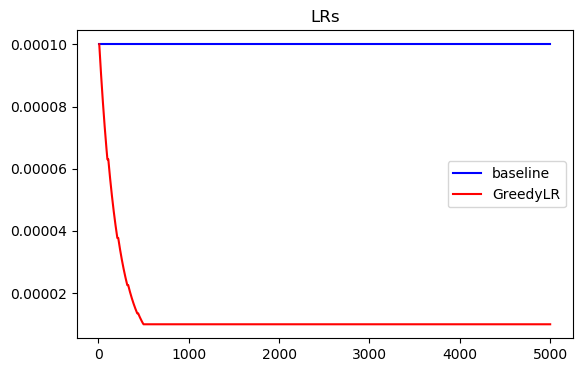

In [421]:
import numpy as np
import matplotlib.pyplot as plt
x1 = np.array(d1)[:,0]
y1 = np.array(d1)[:,1]

x2 = np.array(d2)[:,0] 
y2 = np.array(d2)[:,1]

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x1, y1, 'b-', label='baseline')
line2, = ax.plot(x2, y2, 'r-', label='GreedyLR')
plt.legend()
plt.title('LRs')
fig.set_figheight(4)

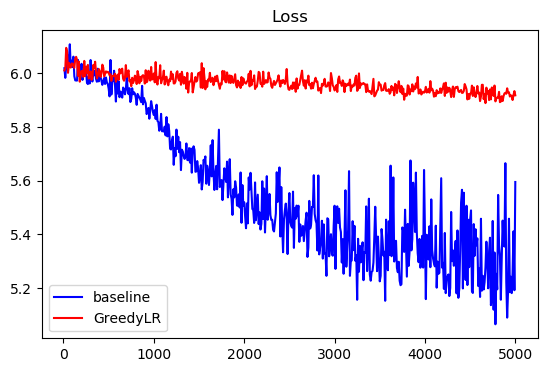

In [422]:
x1 = np.array(d1)[:,0]
y1 = np.array(d1)[:,2]

x2 = np.array(d2)[:,0]
y2 = np.array(d2)[:,2]

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x1, y1, 'b-', label='baseline')
line2, = ax.plot(x2, y2, 'r-', label='GreedyLR')
plt.legend()
plt.title('Loss')
fig.set_figheight(4)

In [423]:
d1[-1][-1] - d2[-1][-1]

-0.32290000000000063

## Image Classification

In [11]:
%pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 41.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [342]:
import run_image_classification
import argparse
import json
import logging
import os
import sys
from unittest.mock import patch

import torch

from transformers import ViTMAEForPreTraining, Wav2Vec2ForPreTraining
from transformers.testing_utils import CaptureLogger, TestCasePlus, get_gpu_count, slow, torch_device
from transformers.utils import is_apex_available
from utils import *

def get_results(output_dir):
    results = {}
    path = os.path.join(output_dir, "all_results.json")
    if os.path.exists(path):
        with open(path, "r") as f:
            results = json.load(f)
    else:
        raise ValueError(f"can't find {path}")
    return results

In [343]:
tmp_dir = get_auto_remove_tmp_dir()
testargs = f"""
    run_image_classification.py
    --output_dir {tmp_dir}
    --model_name_or_path google/vit-base-patch16-224
    --dataset_name Maysee/tiny-imagenet
    --do_train
    --learning_rate 1e-4
    --per_device_train_batch_size 64
    --remove_unused_columns False
    --overwrite_output_dir True
    --metric_for_best_model accuracy
    --max_steps 1000
    --train_val_split 0.2
    --save_strategy no
    --logging_steps 10
    --ignore_mismatched_sizes True
    --seed 42
    --optim sgd
    --lr_scheduler_type constant_with_warmup
""".split()

with patch.object(sys, "argv", testargs):
    run_image_classification.main()
    result = get_results(tmp_dir)


[INFO|training_args.py:1511] 2023-03-24 15:08:20,285 >> PyTorch: setting up devices
[INFO|training_args.py:1292] 2023-03-24 15:08:20,286 >> The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


03/24/2023 15:08:20 - WARNING - run_image_classification - Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: False
03/24/2023 15:08:20 - INFO - run_image_classification - Training/evaluation parameters TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
critical_step=-1,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
factor=0.95,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_

  0%|          | 0/2 [00:00<?, ?it/s]

03/24/2023 15:08:20 - WARNING - datasets.arrow_dataset - Loading cached processed dataset at /root/.cache/huggingface/datasets/Maysee___parquet/Maysee--tiny-imagenet-b0676a0e6b48ef45/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-b0fb943218e6befa.arrow
03/24/2023 15:08:20 - WARNING - datasets.arrow_dataset - Loading cached processed dataset at /root/.cache/huggingface/datasets/Maysee___parquet/Maysee--tiny-imagenet-b0676a0e6b48ef45/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-fc5ce1ae43a8f6a5.arrow
03/24/2023 15:08:20 - WARNING - datasets.arrow_dataset - Loading cached split indices for dataset at /root/.cache/huggingface/datasets/Maysee___parquet/Maysee--tiny-imagenet-b0676a0e6b48ef45/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-18842866901c8da8.arrow and /root/.cache/huggingface/datasets/Maysee___parquet/Maysee--tiny-imagenet-b0676a0e6b48ef45/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b

[INFO|configuration_utils.py:668] 2023-03-24 15:08:20,744 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--google--vit-base-patch16-224/snapshots/2ddc9d4e473d7ba52128f0df4723e478fa14fb80/config.json
[INFO|configuration_utils.py:720] 2023-03-24 15:08:20,746 >> Model config ViTConfig {
  "_name_or_path": "google/vit-base-patch16-224",
  "architectures": [
    "ViTForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "finetuning_task": "image-classification",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "n01443537",
    "1": "n01629819",
    "10": "n01784675",
    "100": "n03447447",
    "101": "n03544143",
    "102": "n03584254",
    "103": "n03599486",
    "104": "n03617480",
    "105": "n03637318",
    "106": "n03649909",
    "107": "n03662601",
    "108": "n03670208",
    "109": "n03706229",
    "11": "n01882714",
    "110": "n03733131",
    "111"

Step,Training Loss
10,5.442500
20,5.439100
30,5.429300
40,5.435100
50,5.408500
60,5.412100
70,5.467600
80,5.449600
90,5.437400
100,5.453500


[INFO|trainer.py:2032] 2023-03-24 15:17:46,306 >> 

Training completed. Do not forget to share your model on huggingface.co/models =)


[INFO|trainer.py:2834] 2023-03-24 15:17:46,309 >> Saving model checkpoint to /tmp/tmpqtgpb1b0
[INFO|configuration_utils.py:457] 2023-03-24 15:17:46,312 >> Configuration saved in /tmp/tmpqtgpb1b0/config.json
[INFO|modeling_utils.py:1762] 2023-03-24 15:17:46,558 >> Model weights saved in /tmp/tmpqtgpb1b0/pytorch_model.bin
[INFO|image_processing_utils.py:203] 2023-03-24 15:17:46,559 >> Image processor saved in /tmp/tmpqtgpb1b0/preprocessor_config.json
[INFO|modelcard.py:449] 2023-03-24 15:17:46,621 >> Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Image Classification', 'type': 'image-classification'}, 'dataset': {'name': 'Maysee/tiny-imagenet', 'type': 'imagefolder', 'config': 'default', 'split': 'train', 'args': 'default'}}


***** train metrics *****
  epoch                    =          0.8
  total_flos               = 4627079235GF
  train_loss               =       5.4236
  train_runtime            =   0:09:24.66
  train_samples_per_second =      113.342
  train_steps_per_second   =        1.771


In [344]:
import json

alllogs = json.load(open(f'{tmp_dir}/trainer_state.json'))
d1 = [ (l['step'], l['learning_rate'], l['loss']) for l in alllogs['log_history'][:-1] ]

!rm -r {tmp_dir}

!rm -r pymp*
!rm -r ./tmp*

rm: cannot remove 'pymp*': No such file or directory
rm: cannot remove './tmp*': No such file or directory


In [345]:
tmp_dir = get_auto_remove_tmp_dir()
testargs = f"""
    run_image_classification.py
    --output_dir {tmp_dir}
    --model_name_or_path google/vit-base-patch16-224
    --dataset_name Maysee/tiny-imagenet
    --do_train
    --learning_rate 1e-4
    --per_device_train_batch_size 64
    --remove_unused_columns False
    --overwrite_output_dir True
    --metric_for_best_model accuracy
    --max_steps 1000
    --train_val_split 0.2
    --save_strategy no
    --logging_steps 10
    --ignore_mismatched_sizes True
    --lr_scheduler_type greedy
    --logging_steps 10
    --min_lr=1e-5
    --smooth True
    --patience 10
    --factor 0.95
    --optim sgd
""".split()

with patch.object(sys, "argv", testargs):
    run_image_classification.main()
    result = get_results(tmp_dir)

[INFO|training_args.py:1511] 2023-03-24 15:17:47,413 >> PyTorch: setting up devices
[INFO|training_args.py:1292] 2023-03-24 15:17:47,414 >> The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


03/24/2023 15:17:47 - WARNING - run_image_classification - Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: False
03/24/2023 15:17:47 - INFO - run_image_classification - Training/evaluation parameters TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
critical_step=-1,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
factor=0.95,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_

  0%|          | 0/2 [00:00<?, ?it/s]

03/24/2023 15:17:47 - WARNING - datasets.arrow_dataset - Loading cached processed dataset at /root/.cache/huggingface/datasets/Maysee___parquet/Maysee--tiny-imagenet-b0676a0e6b48ef45/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-b0fb943218e6befa.arrow
03/24/2023 15:17:47 - WARNING - datasets.arrow_dataset - Loading cached processed dataset at /root/.cache/huggingface/datasets/Maysee___parquet/Maysee--tiny-imagenet-b0676a0e6b48ef45/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-fc5ce1ae43a8f6a5.arrow
03/24/2023 15:17:47 - WARNING - datasets.arrow_dataset - Loading cached split indices for dataset at /root/.cache/huggingface/datasets/Maysee___parquet/Maysee--tiny-imagenet-b0676a0e6b48ef45/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-18842866901c8da8.arrow and /root/.cache/huggingface/datasets/Maysee___parquet/Maysee--tiny-imagenet-b0676a0e6b48ef45/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b

[INFO|configuration_utils.py:668] 2023-03-24 15:17:47,844 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--google--vit-base-patch16-224/snapshots/2ddc9d4e473d7ba52128f0df4723e478fa14fb80/config.json
[INFO|configuration_utils.py:720] 2023-03-24 15:17:47,846 >> Model config ViTConfig {
  "_name_or_path": "google/vit-base-patch16-224",
  "architectures": [
    "ViTForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "finetuning_task": "image-classification",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "n01443537",
    "1": "n01629819",
    "10": "n01784675",
    "100": "n03447447",
    "101": "n03544143",
    "102": "n03584254",
    "103": "n03599486",
    "104": "n03617480",
    "105": "n03637318",
    "106": "n03649909",
    "107": "n03662601",
    "108": "n03670208",
    "109": "n03706229",
    "11": "n01882714",
    "110": "n03733131",
    "111"

GreedyLR settings: patience=10 smooth=True min_lr=1e-05 factor=0.95


Step,Training Loss
10,5.442500
20,5.439100
30,5.429300
40,5.435100
50,5.408500
60,5.412100
70,5.467600
80,5.449600
90,5.437500
100,5.453600


[INFO|trainer.py:2032] 2023-03-24 15:27:14,808 >> 

Training completed. Do not forget to share your model on huggingface.co/models =)


[INFO|trainer.py:2834] 2023-03-24 15:27:14,811 >> Saving model checkpoint to /tmp/tmp3l29cbbu
[INFO|configuration_utils.py:457] 2023-03-24 15:27:14,814 >> Configuration saved in /tmp/tmp3l29cbbu/config.json
[INFO|modeling_utils.py:1762] 2023-03-24 15:27:15,061 >> Model weights saved in /tmp/tmp3l29cbbu/pytorch_model.bin
[INFO|image_processing_utils.py:203] 2023-03-24 15:27:15,063 >> Image processor saved in /tmp/tmp3l29cbbu/preprocessor_config.json
[INFO|modelcard.py:449] 2023-03-24 15:27:15,119 >> Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Image Classification', 'type': 'image-classification'}, 'dataset': {'name': 'Maysee/tiny-imagenet', 'type': 'imagefolder', 'config': 'default', 'split': 'train', 'args': 'default'}}


***** train metrics *****
  epoch                    =          0.8
  total_flos               = 4627079235GF
  train_loss               =       5.4297
  train_runtime            =   0:09:26.02
  train_samples_per_second =      113.069
  train_steps_per_second   =        1.767


In [346]:
alllogs = json.load(open(f'{tmp_dir}/trainer_state.json'))
d2 = [ (l['step'], l['learning_rate'], l['loss']) for l in alllogs['log_history'][:-1] ]

!rm -r {tmp_dir}

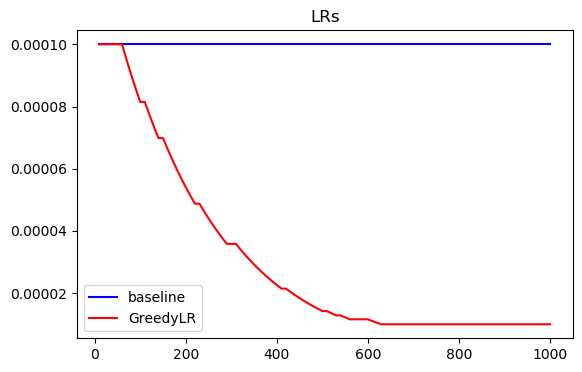

In [347]:
import numpy as np
import matplotlib.pyplot as plt
x1 = np.array(d1)[:,0]
y1 = np.array(d1)[:,1]

x2 = np.array(d2)[:,0] 
y2 = np.array(d2)[:,1]

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x1, y1, 'b-', label='baseline')
line2, = ax.plot(x2, y2, 'r-', label='GreedyLR')
plt.legend()
plt.title('LRs')
fig.set_figheight(4)

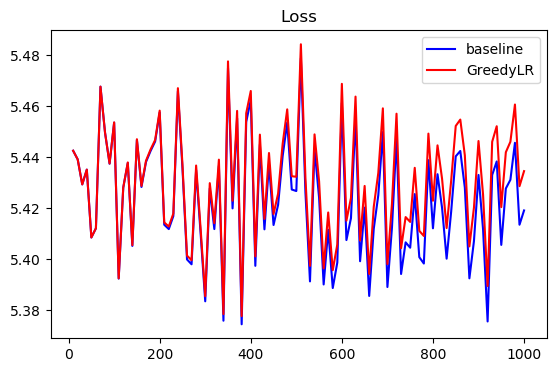

In [348]:
x1 = np.array(d1)[:,0]
y1 = np.array(d1)[:,2]

x2 = np.array(d2)[:,0]
y2 = np.array(d2)[:,2]

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x1, y1, 'b-', label='baseline')
line2, = ax.plot(x2, y2, 'r-', label='GreedyLR')
plt.legend()
plt.title('Loss')
fig.set_figheight(4)

In [349]:
d1[-1][-1] - d2[-1][-1]

-0.015399999999999636

# Semantic Segmentation

In [9]:
%pip install -r semantic-segmentation/requirements.txt

ERROR: Invalid requirement: 'git://github.com/huggingface/accelerate.git' (from line 1 of semantic-segmentation/requirements.txt)
Hint: It looks like a path. File 'git://github.com/huggingface/accelerate.git' does not exist.
Note: you may need to restart the kernel to use updated packages.


In [279]:
import run_semantic_segmentation
import argparse
import json
import logging
import os
import sys
from unittest.mock import patch

import torch

from transformers import ViTMAEForPreTraining, Wav2Vec2ForPreTraining
from transformers.testing_utils import CaptureLogger, TestCasePlus, get_gpu_count, slow, torch_device
from transformers.utils import is_apex_available
from utils import *

def get_results(output_dir):
    results = {}
    path = os.path.join(output_dir, "all_results.json")
    if os.path.exists(path):
        with open(path, "r") as f:
            results = json.load(f)
    else:
        raise ValueError(f"can't find {path}")
    return results

In [293]:
tmp_dir = get_auto_remove_tmp_dir()
testargs = f"""
    run_semantic_segmentation.py
    --output_dir {tmp_dir}
    --model_name_or_path nvidia/mit-b0
    --dataset_name segments/sidewalk-semantic
    --dataset_config mini
    --do_train
    --remove_unused_columns False
    --overwrite_output_dir True
    --max_steps 1000
    --learning_rate=1e-3
    --per_device_train_batch_size=2
    --save_strategy no
    --logging_steps 10
    --optim sgd
    --lr_scheduler_type constant_with_warmup
""".split()

with patch.object(sys, "argv", testargs):
    run_semantic_segmentation.main()
    result = get_results(tmp_dir)

[INFO|training_args.py:1511] 2023-03-23 16:12:34,351 >> PyTorch: setting up devices
[INFO|training_args.py:1292] 2023-03-23 16:12:34,351 >> The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


03/23/2023 16:12:34 - WARNING - run_semantic_segmentation - Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: False
03/23/2023 16:12:34 - INFO - run_semantic_segmentation - Training/evaluation parameters TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
critical_step=-1,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
factor=0.95,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cl

  0%|          | 0/1 [00:00<?, ?it/s]

03/23/2023 16:12:34 - WARNING - datasets.arrow_dataset - Loading cached split indices for dataset at /root/.cache/huggingface/datasets/segments___parquet/segments--sidewalk-semantic-2-007b1ee78ca1e890/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-0380284e0713d034.arrow and /root/.cache/huggingface/datasets/segments___parquet/segments--sidewalk-semantic-2-007b1ee78ca1e890/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-958c67d9d7300917.arrow


[INFO|configuration_utils.py:668] 2023-03-23 16:12:34,841 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--nvidia--mit-b0/snapshots/ed0b85c75627eab6a3c6989627450cf95f115381/config.json
[INFO|configuration_utils.py:720] 2023-03-23 16:12:34,843 >> Model config SegformerConfig {
  "_name_or_path": "nvidia/mit-b0",
  "architectures": [
    "SegformerForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "classifier_dropout_prob": 0.1,
  "decoder_hidden_size": 256,
  "depths": [
    2,
    2,
    2,
    2
  ],
  "downsampling_rates": [
    1,
    4,
    8,
    16
  ],
  "drop_path_rate": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_sizes": [
    32,
    64,
    160,
    256
  ],
  "id2label": {
    "0": "unlabeled",
    "1": "flat-road",
    "2": "flat-sidewalk",
    "3": "flat-crosswalk",
    "4": "flat-cyclinglane",
    "5": "flat-parkingdriveway",
    "6": "flat-railtrack",
    "7": "flat-curb",
    "8": "

Step,Training Loss
10,3.699900
20,3.687800
30,3.691200
40,3.641300
50,3.619000
60,3.626100
70,3.620200
80,3.599600
90,3.581300
100,3.600000


[INFO|trainer.py:2032] 2023-03-23 16:14:30,186 >> 

Training completed. Do not forget to share your model on huggingface.co/models =)


[INFO|trainer.py:2834] 2023-03-23 16:14:30,189 >> Saving model checkpoint to /tmp/tmp6txdsajd
[INFO|configuration_utils.py:457] 2023-03-23 16:14:30,191 >> Configuration saved in /tmp/tmp6txdsajd/config.json
[INFO|modeling_utils.py:1762] 2023-03-23 16:14:30,219 >> Model weights saved in /tmp/tmp6txdsajd/pytorch_model.bin
[INFO|image_processing_utils.py:203] 2023-03-23 16:14:30,220 >> Image processor saved in /tmp/tmp6txdsajd/preprocessor_config.json
[INFO|modelcard.py:449] 2023-03-23 16:14:30,263 >> Dropping the following result as it does not have all the necessary fields:
{}


***** train metrics *****
  epoch                    =       2.35
  total_flos               = 32722901GF
  train_loss               =     3.2186
  train_runtime            = 0:01:55.17
  train_samples_per_second =     17.364
  train_steps_per_second   =      8.682


In [294]:
import json

alllogs = json.load(open(f'{tmp_dir}/trainer_state.json'))
d1 = [ (l['step'], l['learning_rate'], l['loss']) for l in alllogs['log_history'][:-1] ]

!rm -r {tmp_dir}

!rm -r pymp*
!rm -r ./tmp*

rm: cannot remove 'pymp*': No such file or directory
rm: cannot remove './tmp*': No such file or directory


In [295]:
tmp_dir = get_auto_remove_tmp_dir()
testargs = f"""
    run_semantic_segmentation.py
    --output_dir {tmp_dir}
    --model_name_or_path nvidia/mit-b0
    --dataset_name segments/sidewalk-semantic
    --do_train
    --remove_unused_columns False
    --overwrite_output_dir True
    --max_steps 1000
    --learning_rate=1e-3
    --per_device_train_batch_size=4
    --save_strategy no
    --logging_steps 10
    --seed 42
    --lr_scheduler_type greedy
    --logging_steps 10
    --min_lr=1e-5
    --smooth True
    --patience 10
    --factor 0.95
    --optim sgd
""".split()

with patch.object(sys, "argv", testargs):
    run_semantic_segmentation.main()
    result = get_results(tmp_dir)

[INFO|training_args.py:1511] 2023-03-23 16:14:31,022 >> PyTorch: setting up devices
[INFO|training_args.py:1292] 2023-03-23 16:14:31,023 >> The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


03/23/2023 16:14:31 - WARNING - run_semantic_segmentation - Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: False
03/23/2023 16:14:31 - INFO - run_semantic_segmentation - Training/evaluation parameters TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
critical_step=-1,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
factor=0.95,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cl

  0%|          | 0/1 [00:00<?, ?it/s]

03/23/2023 16:14:31 - WARNING - datasets.arrow_dataset - Loading cached split indices for dataset at /root/.cache/huggingface/datasets/segments___parquet/segments--sidewalk-semantic-2-007b1ee78ca1e890/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-0380284e0713d034.arrow and /root/.cache/huggingface/datasets/segments___parquet/segments--sidewalk-semantic-2-007b1ee78ca1e890/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-958c67d9d7300917.arrow


[INFO|configuration_utils.py:668] 2023-03-23 16:14:31,426 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--nvidia--mit-b0/snapshots/ed0b85c75627eab6a3c6989627450cf95f115381/config.json
[INFO|configuration_utils.py:720] 2023-03-23 16:14:31,428 >> Model config SegformerConfig {
  "_name_or_path": "nvidia/mit-b0",
  "architectures": [
    "SegformerForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "classifier_dropout_prob": 0.1,
  "decoder_hidden_size": 256,
  "depths": [
    2,
    2,
    2,
    2
  ],
  "downsampling_rates": [
    1,
    4,
    8,
    16
  ],
  "drop_path_rate": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_sizes": [
    32,
    64,
    160,
    256
  ],
  "id2label": {
    "0": "unlabeled",
    "1": "flat-road",
    "2": "flat-sidewalk",
    "3": "flat-crosswalk",
    "4": "flat-cyclinglane",
    "5": "flat-parkingdriveway",
    "6": "flat-railtrack",
    "7": "flat-curb",
    "8": "

GreedyLR settings: patience=10 smooth=True min_lr=1e-05 factor=0.95


Step,Training Loss
10,3.545800
20,3.569800
30,3.558200
40,3.525600
50,3.507600
60,3.479400
70,3.470400
80,3.503100
90,3.468700
100,3.471900


[INFO|trainer.py:2032] 2023-03-23 16:17:48,009 >> 

Training completed. Do not forget to share your model on huggingface.co/models =)


[INFO|trainer.py:2834] 2023-03-23 16:17:48,012 >> Saving model checkpoint to /tmp/tmpqrbxn7l4
[INFO|configuration_utils.py:457] 2023-03-23 16:17:48,014 >> Configuration saved in /tmp/tmpqrbxn7l4/config.json
[INFO|modeling_utils.py:1762] 2023-03-23 16:17:48,042 >> Model weights saved in /tmp/tmpqrbxn7l4/pytorch_model.bin
[INFO|image_processing_utils.py:203] 2023-03-23 16:17:48,044 >> Image processor saved in /tmp/tmpqrbxn7l4/preprocessor_config.json
[INFO|modelcard.py:449] 2023-03-23 16:17:48,091 >> Dropping the following result as it does not have all the necessary fields:
{}


***** train metrics *****
  epoch                    =       4.69
  total_flos               = 65314911GF
  train_loss               =     3.1817
  train_runtime            = 0:03:16.40
  train_samples_per_second =     20.366
  train_steps_per_second   =      5.091


In [296]:
alllogs = json.load(open(f'{tmp_dir}/trainer_state.json'))
d2 = [ (l['step'], l['learning_rate'], l['loss']) for l in alllogs['log_history'][:-1] ]

!rm -r {tmp_dir}

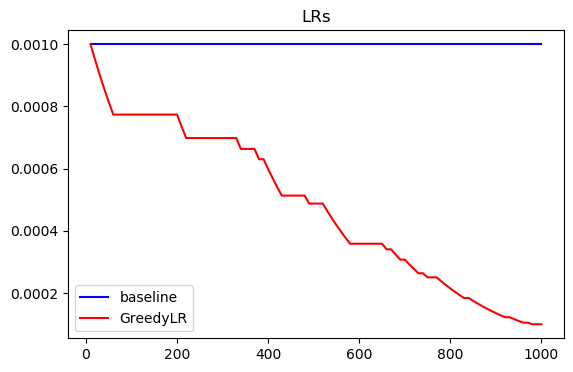

In [297]:
import numpy as np
import matplotlib.pyplot as plt
x1 = np.array(d1)[:,0]
y1 = np.array(d1)[:,1]

x2 = np.array(d2)[:,0] 
y2 = np.array(d2)[:,1]

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x1, y1, 'b-', label='baseline')
line2, = ax.plot(x2, y2, 'r-', label='GreedyLR')
plt.legend()
plt.title('LRs')
fig.set_figheight(4)

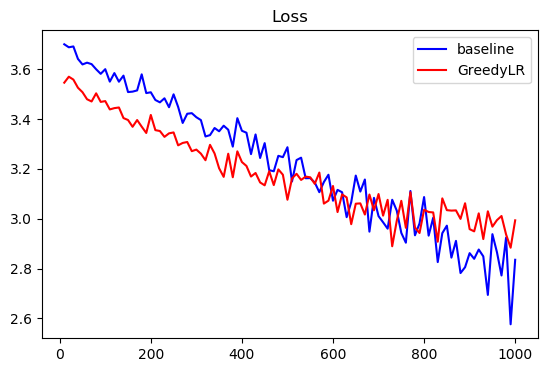

In [298]:
x1 = np.array(d1)[:,0]
y1 = np.array(d1)[:,2]

x2 = np.array(d2)[:,0]
y2 = np.array(d2)[:,2]

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x1, y1, 'b-', label='baseline')
line2, = ax.plot(x2, y2, 'r-', label='GreedyLR')
plt.legend()
plt.title('Loss')
fig.set_figheight(4)

In [299]:
d1[-1][-1] - d2[-1][-1]

-0.1583000000000001

## Summarization

In [124]:
%pip install --use-deprecated=legacy-resolver rouge-score

  Using cached rouge_score-0.1.2.tar.gz (17 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "<string>", line 36, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-7ftn8d1j/rouge-score/setup.py", line 55, in <module>
          python_requires=">=3.7",
        File "/opt/conda/lib/python3.7/site-packages/setuptools/__init__.py", line 87, in setup
          return distutils.core.setup(**attrs)
        File "/opt/conda/lib/python3.7/site-packages/setuptools/_distutils/core.py", line 147, in setup
          _setup_distribution = dist = klass(attrs)
        File "/opt/conda/lib/python3.7/site-packages/setuptools/dist.py", line 479, in __init__
          for k, v in attrs.items()
        File "/opt/conda/lib/python3.7/site-packages/setuptools/_distuti

In [127]:
# %pip --no-cache-dir install -r summarization/requirements.txt

In [130]:
%pip install absl-py nltk numpy six>=1.14

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install --upgrade pip==21.0.0

  Using cached pip-21.0-py3-none-any.whl (1.5 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install --no-cache-dir rouge-score

Keyring is skipped due to an exception: 'keyring.backends'
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [246]:
import run_summarization
import argparse
import json
import logging
import os
import sys
from unittest.mock import patch

import torch

from transformers import ViTMAEForPreTraining, Wav2Vec2ForPreTraining
from transformers.testing_utils import CaptureLogger, TestCasePlus, get_gpu_count, slow, torch_device
from transformers.utils import is_apex_available
from utils import *

def get_results(output_dir):
    results = {}
    path = os.path.join(output_dir, "all_results.json")
    if os.path.exists(path):
        with open(path, "r") as f:
            results = json.load(f)
    else:
        raise ValueError(f"can't find {path}")
    return results

In [247]:
tmp_dir = get_auto_remove_tmp_dir()
testargs = f"""
    run_summarization.py
    --model_name_or_path facebook/bart-base
    --dataset_name amazon_reviews_multi
    --output_dir {tmp_dir}
    --overwrite_output_dir
    --max_steps=1000
    --do_train
    --learning_rate=1e-4
    --per_device_train_batch_size=8
    --predict_with_generate
    --save_strategy no
    --logging_steps 10
    --seed 42
    --fp16 true
    --optim adagrad
    --lr_scheduler_type polynomial
""".split()

testargs.append('--source_prefix')
testargs.append("summarize: ")



with patch.object(sys, "argv", testargs):
    run_summarization.main()
    result = get_results(tmp_dir)

[INFO|training_args.py:1511] 2023-03-23 14:50:37,762 >> PyTorch: setting up devices
[INFO|training_args.py:1292] 2023-03-23 14:50:37,762 >> The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


03/23/2023 14:50:37 - WARNING - run_summarization - Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: True
03/23/2023 14:50:37 - INFO - run_summarization - Training/evaluation parameters Seq2SeqTrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
critical_step=-1,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
factor=0.95,
fp16=True,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=N

  0%|          | 0/3 [00:00<?, ?it/s]

[INFO|configuration_utils.py:668] 2023-03-23 14:50:38,184 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--facebook--bart-base/snapshots/aadd2ab0ae0c8268c7c9693540e9904811f36177/config.json
[INFO|configuration_utils.py:720] 2023-03-23 14:50:38,185 >> Model config BartConfig {
  "_name_or_path": "facebook/bart-base",
  "activation_dropout": 0.1,
  "activation_function": "gelu",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "BartModel"
  ],
  "attention_dropout": 0.1,
  "bos_token_id": 0,
  "classif_dropout": 0.1,
  "classifier_dropout": 0.0,
  "d_model": 768,
  "decoder_attention_heads": 12,
  "decoder_ffn_dim": 3072,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 2,
  "dropout": 0.1,
  "early_stopping": true,
  "encoder_attention_heads": 12,
  "encoder_ffn_dim": 3072,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 6,
  "eos_token_id": 2,
  "forced_bos_token_id": 0,
  "fo

03/23/2023 14:50:40 - WARNING - datasets.arrow_dataset - Loading cached processed dataset at /root/.cache/huggingface/datasets/amazon_reviews_multi/all_languages/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609/cache-0ca927eec117e5f2.arrow


[INFO|trainer.py:543] 2023-03-23 14:50:40,745 >> max_steps is given, it will override any value given in num_train_epochs
[INFO|trainer.py:597] 2023-03-23 14:50:40,746 >> Using cuda_amp half precision backend
[INFO|trainer.py:1758] 2023-03-23 14:50:40,759 >> ***** Running training *****
[INFO|trainer.py:1759] 2023-03-23 14:50:40,760 >>   Num examples = 1199996
[INFO|trainer.py:1760] 2023-03-23 14:50:40,761 >>   Num Epochs = 1
[INFO|trainer.py:1761] 2023-03-23 14:50:40,761 >>   Instantaneous batch size per device = 8
[INFO|trainer.py:1762] 2023-03-23 14:50:40,762 >>   Total train batch size (w. parallel, distributed & accumulation) = 8
[INFO|trainer.py:1763] 2023-03-23 14:50:40,763 >>   Gradient Accumulation steps = 1
[INFO|trainer.py:1764] 2023-03-23 14:50:40,763 >>   Total optimization steps = 1000
[INFO|trainer.py:1766] 2023-03-23 14:50:40,764 >>   Number of trainable parameters = 139420416
[WARNING|logging.py:280] 2023-03-23 14:50:40,828 >> You're using a BartTokenizerFast tokenizer

Step,Training Loss
10,3.988800
20,3.345800
30,3.262900
40,3.020000
50,3.408400
60,3.092900
70,3.044300
80,2.909900
90,2.799100
100,2.925900


[INFO|trainer.py:2032] 2023-03-23 14:52:10,597 >> 

Training completed. Do not forget to share your model on huggingface.co/models =)


[INFO|trainer.py:2834] 2023-03-23 14:52:10,600 >> Saving model checkpoint to /tmp/tmp4f3b3oxg
[INFO|configuration_utils.py:457] 2023-03-23 14:52:10,602 >> Configuration saved in /tmp/tmp4f3b3oxg/config.json
[INFO|configuration_utils.py:362] 2023-03-23 14:52:10,604 >> Configuration saved in /tmp/tmp4f3b3oxg/generation_config.json
[INFO|modeling_utils.py:1762] 2023-03-23 14:52:11,002 >> Model weights saved in /tmp/tmp4f3b3oxg/pytorch_model.bin
[INFO|tokenization_utils_base.py:2163] 2023-03-23 14:52:11,004 >> tokenizer config file saved in /tmp/tmp4f3b3oxg/tokenizer_config.json
[INFO|tokenization_utils_base.py:2170] 2023-03-23 14:52:11,005 >> Special tokens file saved in /tmp/tmp4f3b3oxg/special_tokens_map.json
[INFO|modelcard.py:449] 2023-03-23 14:52:11,136 >> Dropping the following result as it does not have all the necessary fields:
{'task': {'name': '

***** train metrics *****
  epoch                    =       0.01
  total_flos               =  1026231GF
  train_loss               =     2.8676
  train_runtime            = 0:01:29.83
  train_samples            =    1199996
  train_samples_per_second =     89.055
  train_steps_per_second   =     11.132


In [248]:
import json

alllogs = json.load(open(f'{tmp_dir}/trainer_state.json'))
d1 = [ (l['step'], l['learning_rate'], l['loss']) for l in alllogs['log_history'][:-1] ]

!rm -r {tmp_dir}

!rm -r pymp*
!rm -r ./tmp*

rm: cannot remove 'pymp*': No such file or directory
rm: cannot remove './tmp*': No such file or directory


In [249]:
# %store -r d1

In [250]:
tmp_dir = get_auto_remove_tmp_dir()
testargs = f"""
    run_summarization.py
    --model_name_or_path facebook/bart-base
    --dataset_name amazon_reviews_multi
    --output_dir {tmp_dir}
    --overwrite_output_dir
    --max_steps=1000
    --do_train
    --learning_rate=1e-4
    --per_device_train_batch_size=8
    --predict_with_generate
    --save_strategy no
    --logging_steps 10
    --seed 42
    --lr_scheduler_type greedy
    --logging_steps 10
    --min_lr=1e-5
    --smooth True
    --patience 10
    --factor 0.95
    --fp16 true
    --optim adagrad
""".split()

testargs.append('--source_prefix')
testargs.append("summarize: ")

with patch.object(sys, "argv", testargs):
    run_summarization.main()
    result = get_results(tmp_dir)

[INFO|training_args.py:1511] 2023-03-23 14:52:11,980 >> PyTorch: setting up devices
[INFO|training_args.py:1292] 2023-03-23 14:52:11,980 >> The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


03/23/2023 14:52:12 - WARNING - run_summarization - Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: True
03/23/2023 14:52:12 - INFO - run_summarization - Training/evaluation parameters Seq2SeqTrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
critical_step=-1,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
factor=0.95,
fp16=True,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=N

  0%|          | 0/3 [00:00<?, ?it/s]

[INFO|configuration_utils.py:668] 2023-03-23 14:52:12,396 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--facebook--bart-base/snapshots/aadd2ab0ae0c8268c7c9693540e9904811f36177/config.json
[INFO|configuration_utils.py:720] 2023-03-23 14:52:12,398 >> Model config BartConfig {
  "_name_or_path": "facebook/bart-base",
  "activation_dropout": 0.1,
  "activation_function": "gelu",
  "add_bias_logits": false,
  "add_final_layer_norm": false,
  "architectures": [
    "BartModel"
  ],
  "attention_dropout": 0.1,
  "bos_token_id": 0,
  "classif_dropout": 0.1,
  "classifier_dropout": 0.0,
  "d_model": 768,
  "decoder_attention_heads": 12,
  "decoder_ffn_dim": 3072,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 2,
  "dropout": 0.1,
  "early_stopping": true,
  "encoder_attention_heads": 12,
  "encoder_ffn_dim": 3072,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 6,
  "eos_token_id": 2,
  "forced_bos_token_id": 0,
  "fo

03/23/2023 14:52:14 - WARNING - datasets.arrow_dataset - Loading cached processed dataset at /root/.cache/huggingface/datasets/amazon_reviews_multi/all_languages/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609/cache-0ca927eec117e5f2.arrow


[INFO|trainer.py:543] 2023-03-23 14:52:14,929 >> max_steps is given, it will override any value given in num_train_epochs
[INFO|trainer.py:597] 2023-03-23 14:52:14,930 >> Using cuda_amp half precision backend
[INFO|trainer.py:1758] 2023-03-23 14:52:14,943 >> ***** Running training *****
[INFO|trainer.py:1759] 2023-03-23 14:52:14,943 >>   Num examples = 1199996
[INFO|trainer.py:1760] 2023-03-23 14:52:14,944 >>   Num Epochs = 1
[INFO|trainer.py:1761] 2023-03-23 14:52:14,944 >>   Instantaneous batch size per device = 8
[INFO|trainer.py:1762] 2023-03-23 14:52:14,945 >>   Total train batch size (w. parallel, distributed & accumulation) = 8
[INFO|trainer.py:1763] 2023-03-23 14:52:14,945 >>   Gradient Accumulation steps = 1
[INFO|trainer.py:1764] 2023-03-23 14:52:14,947 >>   Total optimization steps = 1000
[INFO|trainer.py:1766] 2023-03-23 14:52:14,948 >>   Number of trainable parameters = 139420416


GreedyLR settings: patience=10 smooth=True min_lr=1e-05 factor=0.95


[WARNING|logging.py:280] 2023-03-23 14:52:15,011 >> You're using a BartTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
10,3.989600
20,3.346600
30,3.265100
40,3.021300
50,3.408200
60,3.092300
70,3.044700
80,2.908200
90,2.795800
100,2.925700


[INFO|trainer.py:2032] 2023-03-23 14:53:45,390 >> 

Training completed. Do not forget to share your model on huggingface.co/models =)


[INFO|trainer.py:2834] 2023-03-23 14:53:45,393 >> Saving model checkpoint to /tmp/tmpfe3fo8da
[INFO|configuration_utils.py:457] 2023-03-23 14:53:45,395 >> Configuration saved in /tmp/tmpfe3fo8da/config.json
[INFO|configuration_utils.py:362] 2023-03-23 14:53:45,397 >> Configuration saved in /tmp/tmpfe3fo8da/generation_config.json
[INFO|modeling_utils.py:1762] 2023-03-23 14:53:45,795 >> Model weights saved in /tmp/tmpfe3fo8da/pytorch_model.bin
[INFO|tokenization_utils_base.py:2163] 2023-03-23 14:53:45,797 >> tokenizer config file saved in /tmp/tmpfe3fo8da/tokenizer_config.json
[INFO|tokenization_utils_base.py:2170] 2023-03-23 14:53:45,798 >> Special tokens file saved in /tmp/tmpfe3fo8da/special_tokens_map.json
[INFO|modelcard.py:449] 2023-03-23 14:53:45,935 >> Dropping the following result as it does not have all the necessary fields:
{'task': {'name': '

***** train metrics *****
  epoch                    =       0.01
  total_flos               =  1026231GF
  train_loss               =     2.8747
  train_runtime            = 0:01:30.44
  train_samples            =    1199996
  train_samples_per_second =     88.454
  train_steps_per_second   =     11.057


In [251]:
alllogs = json.load(open(f'{tmp_dir}/trainer_state.json'))
d2 = [ (l['step'], l['learning_rate'], l['loss']) for l in alllogs['log_history'][:-1] ]

!rm -r {tmp_dir}

In [252]:
%matplotlib inline

Text(0.5, 1.0, 'LRs')

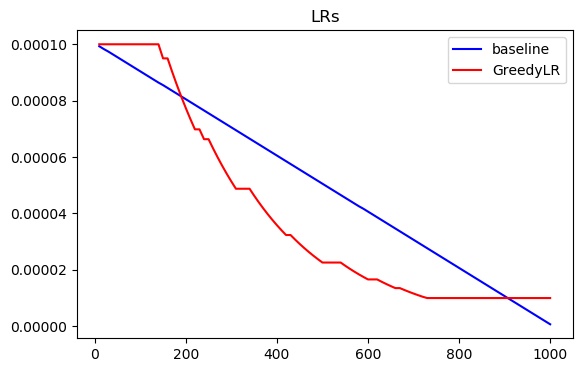

In [253]:
import numpy as np
import matplotlib.pyplot as plt
x1 = np.array(d1)[:,0]
y1 = np.array(d1)[:,1]

x2 = np.array(d2)[:,0] 
y2 = np.array(d2)[:,1]

fig = plt.figure()
fig.set_figheight(4)
ax = fig.add_subplot(111)
line1, = ax.plot(x1, y1, 'b-', label='baseline')
line2, = ax.plot(x2, y2, 'r-', label='GreedyLR')
plt.legend()
plt.title('LRs')

Text(0.5, 1.0, 'Loss')

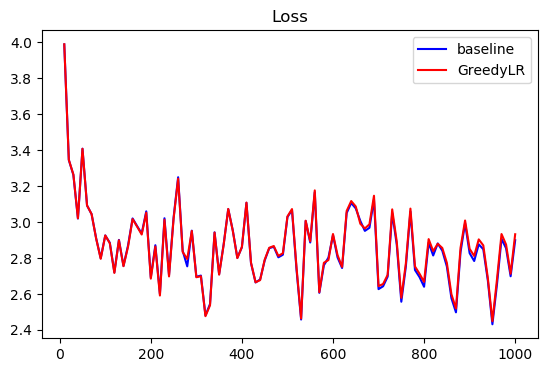

In [254]:
x1 = np.array(d1)[:,0]
y1 = np.array(d1)[:,2]

x2 = np.array(d2)[:,0]
y2 = np.array(d2)[:,2]

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_figheight(4)
line1, = ax.plot(x1, y1, 'b-', label='baseline')
line2, = ax.plot(x2, y2, 'r-', label='GreedyLR')
plt.legend()
plt.title('Loss')

In [255]:
d1[-1][-1] - d2[-1][-1]


-0.03330000000000011

# Audio classification

In [4]:
import run_wav2vec2_pretraining_no_trainer
import argparse
import json
import logging
import os
import sys
from unittest.mock import patch

import torch

from transformers import ViTMAEForPreTraining, Wav2Vec2ForPreTraining
from transformers.testing_utils import CaptureLogger, TestCasePlus, get_gpu_count, slow, torch_device
from transformers.utils import is_apex_available
from utils import *

In [7]:
%pip install -r speech-pretraining/requirements.txt

Keyring is skipped due to an exception: 'keyring.backends'
     |████████████████████████████████| 4.2 MB 28.8 MB/s eta 0:00:01
     |████████████████████████████████| 253 kB 116.3 MB/s eta 0:00:01
     |████████████████████████████████| 377 kB 113.8 MB/s eta 0:00:01
    ERROR: Command errored out with exit status 1:
     command: /opt/conda/bin/python -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-p48k5jnx/audioread_e4053b01c72b47158d277363f467309b/setup.py'"'"'; __file__='"'"'/tmp/pip-install-p48k5jnx/audioread_e4053b01c72b47158d277363f467309b/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-qwkx7pri
         cwd: /tmp/pip-install-p48k5jnx/audioread_e4053b01c72b47158d277363f467309b/
    Complete output (21 lines):
    /tmp/pip-install-p48k5jnx/audioread_e4053b01c72b47158d277363f467309b/setup.

In [6]:
tmp_dir = get_auto_remove_tmp_dir()
testargs = f"""
    run_wav2vec2_pretraining_no_trainer.py
    --output_dir {tmp_dir}
    --model_name_or_path hf-internal-testing/tiny-random-wav2vec2
    --dataset_name librispeech_asr
    --dataset_config_names clean
    --dataset_split_names validation
    --learning_rate 1e-4
    --per_device_train_batch_size 4
    --per_device_eval_batch_size 4
    --preprocessing_num_workers 16
    --max_train_steps 2
    --validation_split_percentage 5
    --seed 42
""".split()


with patch.object(sys, "argv", testargs):
    run_wav2vec2_pretraining_no_trainer.main()
    model = Wav2Vec2ForPreTraining.from_pretrained(tmp_dir)
    self.assertIsNotNone(model)

Extracting data files:   0%|          | 0/4 [00:00<?, ?it/s]

Generating train.100 split:   0%|          | 0/28539 [00:00<?, ? examples/s]

DatasetGenerationError: An error occurred while generating the dataset

# NER

In [15]:
import run_ner
import argparse
import json
import logging
import os
import sys
from unittest.mock import patch

import torch

from transformers import ViTMAEForPreTraining, Wav2Vec2ForPreTraining
from transformers.testing_utils import CaptureLogger, TestCasePlus, get_gpu_count, slow, torch_device
from transformers.utils import is_apex_available
from utils import *

In [16]:
# %pip install -r token-classification/requirements.txt

In [17]:
!nvidia-smi

Wed Mar 22 16:16:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A10G         Off  | 00000000:00:1E.0 Off |                    0 |
|  0%   24C    P0    55W / 300W |   6535MiB / 22731MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [271]:
tmp_dir = get_auto_remove_tmp_dir()
testargs = f"""
    run_ner.py
    --model_name_or_path camembert/camembert-large
    --dataset_name xglue
    --dataset_config ner
    --output_dir {tmp_dir}
    --overwrite_output_dir
    --do_train
    --max_steps=1000
    --learning_rate=1e-4
    --per_device_train_batch_size=16
    --save_strategy no
    --seed 42
    --logging_steps 10
    --fp16 true
    --optim sgd
    --lr_scheduler_type constant_with_warmup
""".split()


#     --lr_scheduler_type greedy
#     --logging_steps 10
#     --min_lr=1e-5
#     --smooth True
#     --patience 10
#     --factor 0.95

with patch.object(sys, "argv", testargs):
    run_ner.main()
    result = get_results(tmp_dir)
    
    
    # --optim: invalid choice: 'as' (choose from 'adamw_hf', 'adamw_torch', 'adamw_torch_xla', 'adamw_apex_fused', 'adafactor', 'adamw_bnb_8bit', 'adamw_anyprecision', 'sgd', 'adagrad')

[INFO|training_args.py:1511] 2023-03-23 15:42:38,042 >> PyTorch: setting up devices
[INFO|training_args.py:1292] 2023-03-23 15:42:38,042 >> The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


03/23/2023 15:42:38 - WARNING - run_ner - Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: True
03/23/2023 15:42:38 - INFO - run_ner - Training/evaluation parameters TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
critical_step=-1,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
factor=0.95,
fp16=True,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False

  0%|          | 0/9 [00:00<?, ?it/s]

[INFO|configuration_utils.py:668] 2023-03-23 15:42:38,626 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--camembert--camembert-large/snapshots/df7dbf53dd70551faa6b4ec45deb4a566445c7cc/config.json
[INFO|configuration_utils.py:720] 2023-03-23 15:42:38,627 >> Model config CamembertConfig {
  "_name_or_path": "camembert/camembert-large",
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "finetuning_task": "ner",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8"
  },
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
   

[INFO|tokenization_utils_base.py:1802] 2023-03-23 15:42:39,036 >> loading file sentencepiece.bpe.model from cache at /root/.cache/huggingface/hub/models--camembert--camembert-large/snapshots/df7dbf53dd70551faa6b4ec45deb4a566445c7cc/sentencepiece.bpe.model
[INFO|tokenization_utils_base.py:1802] 2023-03-23 15:42:39,037 >> loading file tokenizer.json from cache at None
[INFO|tokenization_utils_base.py:1802] 2023-03-23 15:42:39,038 >> loading file added_tokens.json from cache at None
[INFO|tokenization_utils_base.py:1802] 2023-03-23 15:42:39,038 >> loading file special_tokens_map.json from cache at None
[INFO|tokenization_utils_base.py:1802] 2023-03-23 15:42:39,039 >> loading file tokenizer_config.json from cache at None
[INFO|configuration_utils.py:668] 2023-03-23 15:42:39,045 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--camembert--camembert-large/snapshots/df7dbf53dd70551faa6b4ec45deb4a566445c7cc/config.json
[INFO|configuration_utils.py:720

[INFO|modeling_utils.py:2398] 2023-03-23 15:43:26,823 >> loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--camembert--camembert-large/snapshots/df7dbf53dd70551faa6b4ec45deb4a566445c7cc/pytorch_model.bin
[WARNING|modeling_utils.py:3010] 2023-03-23 15:43:33,744 >> Some weights of the model checkpoint at camembert/camembert-large were not used when initializing CamembertForTokenClassification: ['lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing CamembertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertF

Running tokenizer on train dataset:   0%|          | 0/14042 [00:00<?, ? examples/s]

[WARNING|tokenization_utils_base.py:2425] 2023-03-23 15:43:33,787 >> Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


03/23/2023 15:43:33 - INFO - datasets.arrow_dataset - Caching processed dataset at /root/.cache/huggingface/datasets/xglue/ner/1.0.0/8566eedecd9ab28e01c051c023dadf97bf408e5195f76b06aba70ebd4697ae08/cache-2b27230313dc344b.arrow


[INFO|trainer.py:543] 2023-03-23 15:43:35,273 >> max_steps is given, it will override any value given in num_train_epochs
[INFO|trainer.py:597] 2023-03-23 15:43:35,274 >> Using cuda_amp half precision backend
[INFO|trainer.py:739] 2023-03-23 15:43:35,275 >> The following columns in the training set don't have a corresponding argument in `CamembertForTokenClassification.forward` and have been ignored: words, ner. If words, ner are not expected by `CamembertForTokenClassification.forward`,  you can safely ignore this message.
[INFO|trainer.py:1758] 2023-03-23 15:43:35,284 >> ***** Running training *****
[INFO|trainer.py:1759] 2023-03-23 15:43:35,285 >>   Num examples = 14042
[INFO|trainer.py:1760] 2023-03-23 15:43:35,286 >>   Num Epochs = 2
[INFO|trainer.py:1761] 2023-03-23 15:43:35,286 >>   Instantaneous batch size per device = 16
[INFO|trainer.py:1762] 2023-03-23 15:43:35,287 >>   Total train batch size (w. parallel, distributed & accumulation) = 16
[INFO|trainer.py:1763] 2023-03-23 15

Step,Training Loss
10,2.314500
20,2.310300
30,2.297800
40,2.295300
50,2.280200
60,2.268500
70,2.269500
80,2.258300
90,2.241100
100,2.244900


[INFO|trainer.py:2032] 2023-03-23 15:45:45,500 >> 

Training completed. Do not forget to share your model on huggingface.co/models =)


[INFO|trainer.py:2834] 2023-03-23 15:45:45,502 >> Saving model checkpoint to /tmp/tmpecuep_dj
[INFO|configuration_utils.py:457] 2023-03-23 15:45:45,504 >> Configuration saved in /tmp/tmpecuep_dj/config.json
[INFO|modeling_utils.py:1762] 2023-03-23 15:45:46,459 >> Model weights saved in /tmp/tmpecuep_dj/pytorch_model.bin
[INFO|tokenization_utils_base.py:2163] 2023-03-23 15:45:46,461 >> tokenizer config file saved in /tmp/tmpecuep_dj/tokenizer_config.json
[INFO|tokenization_utils_base.py:2170] 2023-03-23 15:45:46,462 >> Special tokens file saved in /tmp/tmpecuep_dj/special_tokens_map.json
[INFO|modelcard.py:449] 2023-03-23 15:45:46,552 >> Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Token Classification', 'type': 'token-classification'}, 'dataset': {'name': 'xglue ner', 'type': 'xglue', 'config': 'ner', '

***** train metrics *****
  epoch                    =       1.14
  total_flos               =  2044570GF
  train_loss               =     1.9292
  train_runtime            = 0:02:10.21
  train_samples            =      14042
  train_samples_per_second =    122.878
  train_steps_per_second   =       7.68


In [272]:
import json

alllogs = json.load(open(f'{tmp_dir}/trainer_state.json'))
d1 = [ (l['step'], l['learning_rate'], l['loss']) for l in alllogs['log_history'][:-1] ]

!rm -r {tmp_dir}

!rm -r pymp*
!rm -r ./tmp*

rm: cannot remove 'pymp*': No such file or directory
rm: cannot remove './tmp*': No such file or directory


In [273]:
tmp_dir = get_auto_remove_tmp_dir()
testargs = f"""
    run_ner.py
    --model_name_or_path camembert/camembert-large
    --dataset_name xglue
    --dataset_config ner
    --output_dir {tmp_dir}
    --overwrite_output_dir
    --do_train
    --max_steps=1000
    --learning_rate=1e-4
    --per_device_train_batch_size=16
    --save_strategy no
    --seed 42
    --logging_steps 10
    --fp16 true
    --lr_scheduler_type greedy
    --logging_steps 10
    --min_lr=1e-5
    --smooth True
    --patience 10
    --factor 0.95
    --fp16 True
    --optim sgd
""".split()




with patch.object(sys, "argv", testargs):
    run_ner.main()
    result = get_results(tmp_dir)

[INFO|training_args.py:1511] 2023-03-23 15:45:47,424 >> PyTorch: setting up devices
[INFO|training_args.py:1292] 2023-03-23 15:45:47,425 >> The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


03/23/2023 15:45:47 - WARNING - run_ner - Process rank: -1, device: cuda:0, n_gpu: 1distributed training: False, 16-bits training: True
03/23/2023 15:45:47 - INFO - run_ner - Training/evaluation parameters TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
critical_step=-1,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
factor=0.95,
fp16=True,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False

  0%|          | 0/9 [00:00<?, ?it/s]

[INFO|configuration_utils.py:668] 2023-03-23 15:45:47,896 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--camembert--camembert-large/snapshots/df7dbf53dd70551faa6b4ec45deb4a566445c7cc/config.json
[INFO|configuration_utils.py:720] 2023-03-23 15:45:47,898 >> Model config CamembertConfig {
  "_name_or_path": "camembert/camembert-large",
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "finetuning_task": "ner",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8"
  },
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
   

03/23/2023 15:45:51 - WARNING - datasets.arrow_dataset - Loading cached processed dataset at /root/.cache/huggingface/datasets/xglue/ner/1.0.0/8566eedecd9ab28e01c051c023dadf97bf408e5195f76b06aba70ebd4697ae08/cache-2b27230313dc344b.arrow


[INFO|trainer.py:543] 2023-03-23 15:45:51,252 >> max_steps is given, it will override any value given in num_train_epochs
[INFO|trainer.py:597] 2023-03-23 15:45:51,253 >> Using cuda_amp half precision backend
[INFO|trainer.py:739] 2023-03-23 15:45:51,254 >> The following columns in the training set don't have a corresponding argument in `CamembertForTokenClassification.forward` and have been ignored: words, ner. If words, ner are not expected by `CamembertForTokenClassification.forward`,  you can safely ignore this message.
[INFO|trainer.py:1758] 2023-03-23 15:45:51,263 >> ***** Running training *****
[INFO|trainer.py:1759] 2023-03-23 15:45:51,264 >>   Num examples = 14042
[INFO|trainer.py:1760] 2023-03-23 15:45:51,264 >>   Num Epochs = 2
[INFO|trainer.py:1761] 2023-03-23 15:45:51,265 >>   Instantaneous batch size per device = 16
[INFO|trainer.py:1762] 2023-03-23 15:45:51,265 >>   Total train batch size (w. parallel, distributed & accumulation) = 16
[INFO|trainer.py:1763] 2023-03-23 15

GreedyLR settings: patience=10 smooth=True min_lr=1e-05 factor=0.95


Step,Training Loss
10,2.314500
20,2.310300
30,2.297800
40,2.295300
50,2.280200
60,2.268500
70,2.269100
80,2.257500
90,2.239500
100,2.242000


[INFO|trainer.py:2032] 2023-03-23 15:48:01,327 >> 

Training completed. Do not forget to share your model on huggingface.co/models =)


[INFO|trainer.py:2834] 2023-03-23 15:48:01,331 >> Saving model checkpoint to /tmp/tmp5tk46jw1
[INFO|configuration_utils.py:457] 2023-03-23 15:48:01,333 >> Configuration saved in /tmp/tmp5tk46jw1/config.json
[INFO|modeling_utils.py:1762] 2023-03-23 15:48:02,291 >> Model weights saved in /tmp/tmp5tk46jw1/pytorch_model.bin
[INFO|tokenization_utils_base.py:2163] 2023-03-23 15:48:02,293 >> tokenizer config file saved in /tmp/tmp5tk46jw1/tokenizer_config.json
[INFO|tokenization_utils_base.py:2170] 2023-03-23 15:48:02,295 >> Special tokens file saved in /tmp/tmp5tk46jw1/special_tokens_map.json
[INFO|modelcard.py:449] 2023-03-23 15:48:02,380 >> Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Token Classification', 'type': 'token-classification'}, 'dataset': {'name': 'xglue ner', 'type': 'xglue', 'config': 'ner', '

***** train metrics *****
  epoch                    =       1.14
  total_flos               =  2044570GF
  train_loss               =     1.3753
  train_runtime            = 0:02:10.05
  train_samples            =      14042
  train_samples_per_second =    123.021
  train_steps_per_second   =      7.689


In [274]:
alllogs = json.load(open(f'{tmp_dir}/trainer_state.json'))
d2 = [ (l['step'], l['learning_rate'], l['loss']) for l in alllogs['log_history'][:-1] ]

!rm -r {tmp_dir}

%matplotlib inline

Text(0.5, 1.0, 'LRs')

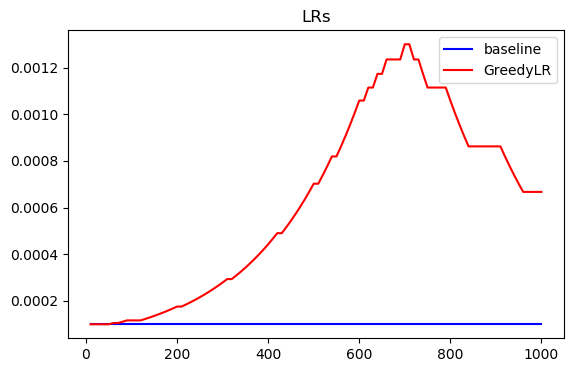

In [275]:
import numpy as np
import matplotlib.pyplot as plt
x1 = np.array(d1)[:,0]
y1 = np.array(d1)[:,1]

x2 = np.array(d2)[:,0] 
y2 = np.array(d2)[:,1]

fig = plt.figure()
fig.set_figheight(4)
ax = fig.add_subplot(111)
line1, = ax.plot(x1, y1, 'b-', label='baseline')
line2, = ax.plot(x2, y2, 'r-', label='GreedyLR')
plt.legend()
plt.title('LRs')

Text(0.5, 1.0, 'Loss')

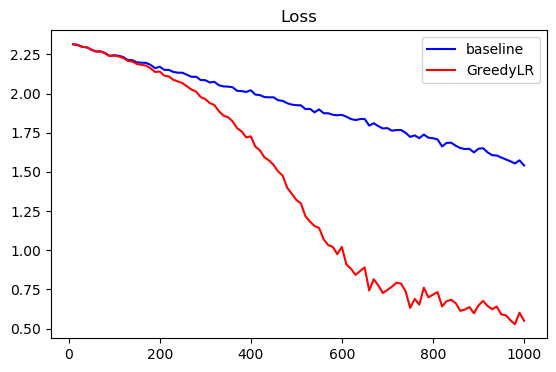

In [276]:
x1 = np.array(d1)[:,0]
y1 = np.array(d1)[:,2]

x2 = np.array(d2)[:,0]
y2 = np.array(d2)[:,2]

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_figheight(4)
line1, = ax.plot(x1, y1, 'b-', label='baseline')
line2, = ax.plot(x2, y2, 'r-', label='GreedyLR')
plt.legend()
plt.title('Loss')

In [277]:
# print(d1[-1][int(0.1*len(d1[-1]))-1] > d2[-1][int(0.1*len(d2[-1]))-1])
# print(d1[-1][int(0.5*len(d1[-1]))-1] > d2[-1][int(0.5*len(d2[-1]))-1])
# print(d1[-1][int(1*len(d1[-1]))-1] > d2[-1][int(1*len(d2[-1]))-1])


d1[-1][-1] - d2[-1][-1]

0.9912

In [72]:
import sys
import os
SRC_DIRS = [
    os.path.join('./', dirname) for dirname in [
        "text-generation",
        "text-classification",
        "token-classification",
        "language-modeling",
        "multiple-choice",
        "question-answering",
        "summarization",
        "translation",
        "image-classification",
        "speech-recognition",
        "audio-classification",
        "speech-pretraining",
        "image-pretraining",
        "semantic-segmentation",
    ]
]
sys.path.extend(SRC_DIRS)